In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import matplotlib

In [6]:
df=pd.read_csv(r"C:\Users\sumed\Downloads\project\CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,EngineSize,Cylinders,Transmission,Fuel Type,FuelConsumptionCity,FuelConsumptionHwy,FuelConsumptionComb,Fuel Consumption Comb (mpg),CO2Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
cdf=df[['EngineSize','Cylinders','FuelConsumptionCity','FuelConsumptionHwy','FuelConsumptionComb','CO2Emissions']]
cdf.head(5)

,EngineSize,Cylinders,FuelConsumptionCity,FuelConsumptionHwy,FuelConsumptionComb,CO2Emissions
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


Text(0, 0.5, 'Emission')

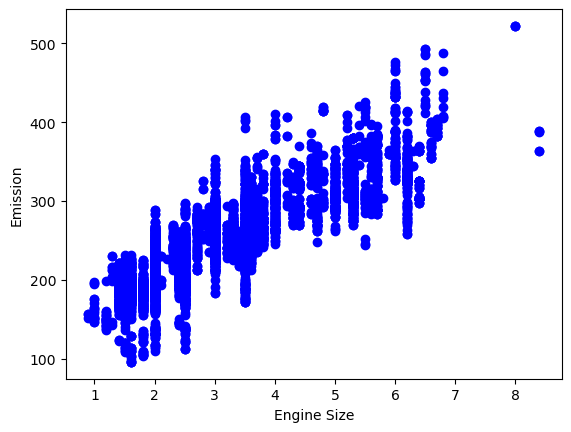

In [8]:
plt.scatter(cdf.EngineSize, y=cdf.CO2Emissions, c="blue")
plt.xlabel("Engine Size")
plt.ylabel("Emission")


In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['EngineSize','Cylinders','FuelConsumptionComb']])
y = np.asanyarray(train[['CO2Emissions']])
regr.fit(x,y)
print('Coefficients: ', regr.coef_)

Coefficients:  [[ 5.42848342  6.41273513 13.36415266]]


In [11]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = cdf[['EngineSize','Cylinders','FuelConsumptionComb']]
y = cdf[['CO2Emissions']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test) 

In [12]:
score = r2_score(y_test, y_pred)

In [13]:
import pickle

In [14]:
pickle.dump(regr,open("model.pkl","wb"))

In [15]:
loaded_model = pickle.load(open("model.pkl","rb"))
result= loaded_model.predict(X_test)
print = result